In [44]:
import random
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [67]:
def generate_random_game():
  results = [] 
  counter = 0
  for frame in range(10):
    rolls = []
    if frame != 9:
      # First Nine Frames.
      first = random.randint(0, 10)
      rolls.append(first)
      if first == 10:
        second = 0
      else:
        second = random.randint(0, 10-first)
        rolls.append(second)
      third = 0
    else:
      # Ninth Frame Rules
      first = random.randint(0, 10)
      rolls.append(first)
      if first == 10:
        second = random.randint(0, 10)
        rolls.append(second)
      else:
        second = random.randint(0, 10-first)
        rolls.append(second)
        
      # Third Frame Logic
      if first + second == 10 and first < 10:
        # Second frame was a spare.
        third = random.randint(0, 10)
        rolls.append(third)
      elif first == 10 and second < 10:
        # First frame was a strike
        third = random.randint(0, 10-second)
        rolls.append(third)
      elif first == 10 and second == 10:
        # Two strikes
        third = random.randint(0, 10)
        rolls.append(third)
      else:
        third = 0
    counter += 1
    results.append(rolls)
  return results 

def score_game(game):
  frame_scores = []
  cumulative_scores = []
  total_score = 0
  for i, frame in enumerate(game):
    points = 0
    if i < 9:
      # Strike
      if game[i][0] == 10:
        points += game[i][0]
        points += game[i+1][0]
        if len(game[i+1]) > 1:
          points += game[i+1][1]
        else:
          points += game[i+2][0]
     
      # Spare
      elif sum(game[i]) == 10 and game[i][0] != 10:
        points += sum(game[i])
        points += game[i+1][0]
      
      # Normal
      else:
        points += sum(frame)
    
    if i == 9:
      points += sum(frame)
  
    total_score += points
    cumulative_scores.append(total_score)
    frame_scores.append(points)
    
  return (total_score, frame_scores, cumulative_scores)

In [69]:
scores = [score_game(generate_random_game())[0] for _ in range(10000)]
frame_avg = [np.mean(score_game(generate_random_game())[1]) for _ in range(10000)]

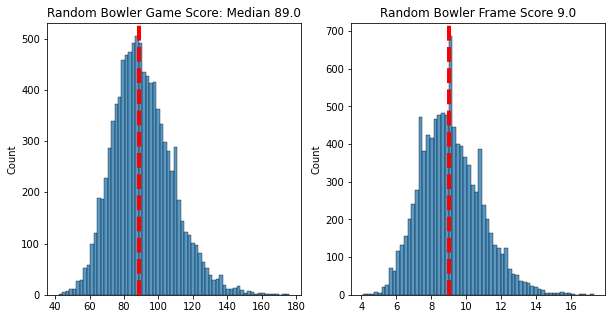

In [71]:
fig, (ax_l, ax_r) = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
ax_l = sns.histplot(scores, ax=ax_l)
median = np.median(scores)
ax_l.set_title(f"Random Bowler Game Score: Median {median}")
ax_l.axvline(median, color='r', linestyle='--', linewidth=4)

ax_r = sns.histplot(frame_avg, ax=ax_r)
median = np.median(frame_avg)
ax_r.set_title(f"Random Bowler Frame Score {median}")
ax_r.axvline(median, color='r', linestyle='--', linewidth=4)


In [65]:
game = generate_random_game()
print(game)

[[4, 5], [7, 0], [4, 0], [10], [7, 2], [6, 0], [6, 0], [5, 5], [1, 9], [10, 9, 0]]


In [68]:
score_game(game)

(110,
 [9, 7, 4, 19, 9, 6, 6, 11, 20, 19],
 [9, 16, 20, 39, 48, 54, 60, 71, 91, 110])